# **- Pipeline crack detection -**

# **Denoising-V1**



# **0. Enviroment setup**

### Installing libraries

###  Libraries

In [16]:
from google.colab import drive
drive.mount('/content/drive')


import cv2
import os
import random
import numpy as np

import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Functions

In [12]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()




# **1. Import data**

In [28]:
class img_storage:
  def __init__ (self, good_img, good_roi, wrong_img, wrong_roi):
    self.good_img = good_img
    self.good_roi = good_roi
    self.wrong_img = wrong_img
    self.wrong_roi = wrong_roi

# Stablish path
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 900

# Good iimages
files = os.listdir( "Onak" )

good_img = []

for file in files:
  img = cv2.imread("Onak/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  good_img.append( img )

## Wrong + ROI
files = os.listdir( "Txarrak" )
files = sorted(files)

wrong_img = []
wrong_roi = []

for file in files:

  img = cv2.imread( "Txarrak/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  if file.endswith("_ROI.bmp"):
    wrong_roi.append( img )
  else:
    wrong_img.append( img )

# Generate arrays
good_img = np.array(good_img)
wrong_img= np.array(wrong_img)
wrong_roi = np.array(wrong_roi)
# wrong_roi = wrong_roi[:, :, :, 0]

good_roi = np.ones( good_img.shape, dtype = 'int16' ) * 255
good_roi[:, 1, 1] = 254

saved = img_storage(good_img, good_roi, wrong_img, wrong_roi)


/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



	-- IMAGES --
  Good images:  	(150, 900, 900)
  Good ROI:     	(150, 900, 900)
  Wrong images: 	(145, 900, 900)
  Wrong ROI:    	(145, 900, 900)

Index: 58


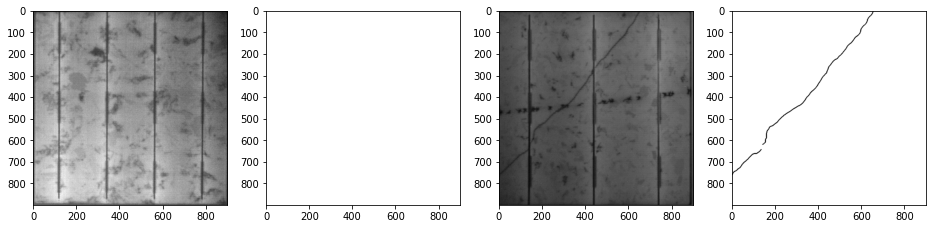

Index: 58


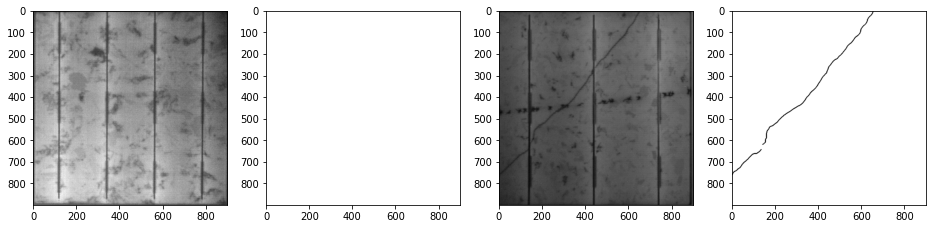

In [74]:
good_img  = saved.good_img
good_roi  = saved.good_roi
wrong_img = saved.wrong_img
wrong_roi = saved.wrong_roi

# Display data shape
print(format.bold + "\t-- IMAGES --" + format.end)
print("  Good images:  \t" + str( good_img.shape ) )
print("  Good ROI:     \t" + str( good_roi.shape ) )
print("  Wrong images: \t" + str( wrong_img.shape ) )
print("  Wrong ROI:    \t" + str( wrong_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(wrong_img) - 1)
  index = 58

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(141)
  plt.imshow( good_img[index], cmap = "gray")
  plt.subplot(142)
  plt.imshow( good_roi[index], cmap = "gray")
  plt.subplot(143)
  plt.imshow( wrong_img[index], cmap = "gray")
  plt.subplot(144)
  plt.imshow( wrong_roi[index], cmap = "gray")
  plt.show()

# **2. Generating the filter**

38.553333333333335 - 90.45333333333333


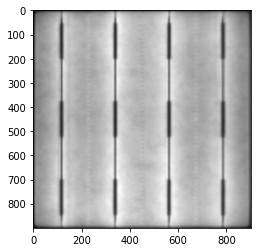

In [58]:
size = good_img.shape

denoiser = np.zeros( (size[1], size[2]) )

for i in range(size[1]):
  for j in range(size[2]):

    x = good_img[:, i, j]
    denoiser[i, j] = x.mean()

print(str(denoiser.min()) + " - " + str(denoiser.max()))

plt.imshow( denoiser, cmap = "gray")
plt.show()

# **3. Filtering**

Index: 52


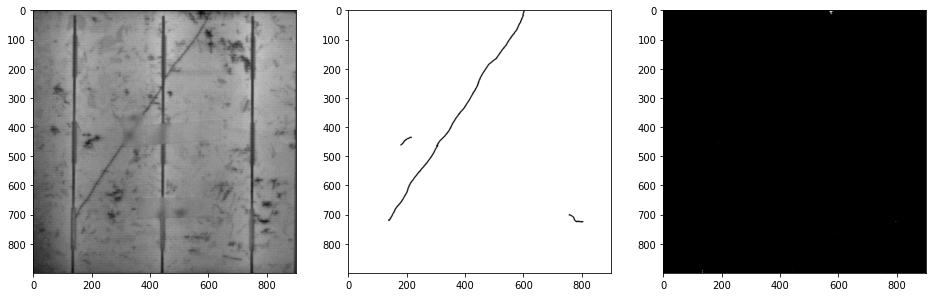

In [96]:
# Get image
index = random.randint(0, len(wrong_img) - 1)
index = 52

img = wrong_img[index]

##### MY FILTER #####
out = img

out = out - out.min()
out = out / out.max()
out = out * 255

out = out < 20
#####################

# Display results
print(format.bold + "Index: " + format.end + str(index))

plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.imshow( wrong_img[index], cmap = "gray")
plt.subplot(132)
plt.imshow( wrong_roi[index], cmap = "gray")
plt.subplot(133)
plt.imshow( out, cmap = "gray")
plt.show()

